**O vídeo da apresentação está no [Link](https://youtu.be/oVHqSMMastg)**



---



---
<br>

ESPECIALIZAÇÃO EM GEOPROCESSAMENTO — UFABC

Disciplina: Introdução à Programação para o Geoprocessamento

Polo Balneário São Francisco







---



---




Cristiano Stefani Selegrin —————————— 33202320813

Ozana Rebouças Silva ———————————— 33202320795

<br>

---



---




# **DISTRIBUIÇÃO DA POPULAÇÃO E DOS EQUIPAMENTOS DE SAÚDE DE ONCOLOGIA E NEFROLOGIA NAS REGIÕES DE SAÚDE E IRECÊ E JACOBINA**

---



# 1 - **JUSTIFICATIVA**

---



Para o trabalho de TCC na especialização em geoprocessamento da UFABC
estamos analisando algumas temáticas de interesse. Uma possível linha de trabalho
é em Geografia da Saúde, especificamente trabalharemos com o acesso aos recursos
de atenção à saúde em média e alta complexidade nas Regiões de Saúde de Irecê e
Jacobina na macrorregião centro-norte no Estado da Bahia. Assim, o trabalho
desenvolvido nessa disciplina tratará desse tema e contribuirá para que possamos
aplicar os conhecimentos adquiridos na disciplina, aplicando a linguagem Python e,
ao mesmo tempo, definir caminhos para o trabalho final do curso e, também, contribuir
por meio do conhecimento geográfico e das ferramentas de programação e
geoprocessamento com as reflexões sobre acesso à saúde e a efetivação da
integralidade da atenção no SUS no Estado da Bahia.

# 2 - **OBJETIVOS**


---


O objetivo principal é mostrar nos mapas os municípios e suas regiões de saúde e localizar os principais equipamentos públicos de saúde existentes. A partir dessa caracterização objetiva-se problematizar a relação entre a localização dos municípios e fatores como, população, distância, distribuição e a quantidade equipamentos para atendimento da população (hospitais de grande porte, policlínicas e centros de tratamento de alta complexidade). Busca-se também questionar a existência de vazios assistenciais nas regiões de saúde e sua relação com a acessibilidade à saúde no interior da Bahia, principalmente para o tratamento de alta complexidade.

## 2.1 - OBJETIVOS ESPECÍFICOS


---

*   Elaborar mapas das RS de Irecê e Jacobina e definir os limites
municipais;
*   Localizar os principais centros para atendimento em média e alta
complexidade do SUS disponíveis nas duas Regiões de Saúde;
*    Elaborar questionamentos sobre as condições de
acesso à saúde nas regiões de estudo, a partir da produção e análise dos primeiros mapas.

#  3 - **MÉTODO**

---



O método empregado seguiu os seguintes passos:

*   Utilizando as bibliotecas `pandas` e `geopandas`:
    
    *   Carregar os arquivos `.xlsx` e `.shp`;
    *   Gerar os respectivos dataframes e geodataframes;
    *   Filtrar e mesclar os dados;
    *   Definir os geodataframes que serão utilizados na plotagem.
*   Utilizando a biblioteca `matplotlib.pyplot`:
    
    *   Plotar mapas de localização e distribuição.
*   Utilizando as bibliotecas `geopandas` e `folium`:
    
    *   Plotar um mapa iterativo;
    *   Exportar para o `drive` o mapa no formato `.html`.

# 4 - **DESENVOLVIMENTO**

---




## 4.1 - CARREGAMENTO DOS DADOS

---



### 4.1.1 - Bibliotecas

In [51]:
!pip install unidecode -q
!pip install mapclassify -q

In [52]:
#Carregar as bibliotecas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import mapclassify
import branca
from unidecode import unidecode
import os
import base64
import folium

In [53]:
#Configuração do Pandas
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

### 4.1.2 - Arquivos

In [54]:
# @title 4.1.2.1 - Conexão com o GoogleDrive

if not os.path.exists('/content/drive'):

    from google.colab import drive
    drive.mount('/content/drive')
else:
    ""

In [55]:
# @title *4.1.2.2 - Dataframes*

#Carregar os arquivos xlsx e converte em dataframe
pop_BR_df = pd.read_excel('/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Planilhas/populacao.xlsx')
pop_BR_df['CD_MUN'] = pop_BR_df['CD_MUN'].astype(str)

In [56]:
# @title *4.1.2.3 - GeoDataframes*

# Carregar os shapefiles e converte em geodataframe
reg_BA_gdf = gpd.read_file('/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Shapefile/BA_Microrregioes_2022.shp')
mun_BA_gdf = gpd.read_file('/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Shapefile/BA_Municipios_2022.shp')
pontos_gdf = gpd.read_file('/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Shapefile/Equipamentos_MAC_RsIreceJacobina.shp')
saidas = '/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Saidas/'

## 4.2 TRATAMENTO DOS DADOS

---



<Axes: >

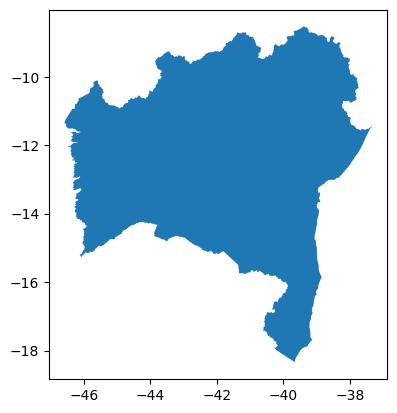

In [57]:
#Cria o geodataframe do Estado da Bahia
BA_UF_gdf = reg_BA_gdf.dissolve(by='SIGLA_UF',
                                aggfunc={'AREA_KM2': 'sum'}
                                )
BA_UF_gdf.plot()

In [58]:
# Mescla geodataframe com dataframe
mun_BA_mesc_gdf = mun_BA_gdf.drop(columns=['SIGLA_UF']).merge(pop_BR_df.drop(columns=['NM_MUN']), left_on='CD_MUN', right_on='CD_MUN', how='left')
mun_BA_mesc_gdf.head()

,CD_MUN,NM_MUN,AREA_KM2,geometry,POPULACAO
0,2900108,Abaíra,538.68,"POLYGON ((-41.74667 -13.32509, -41.74679 -13.3...",7301
1,2900207,Abaré,"1,604.92","POLYGON ((-39.23481 -8.70419, -39.23427 -8.705...",17639
2,2900306,Acajutiba,181.47,"POLYGON ((-38.02809 -11.75007, -38.02811 -11.7...",13795
3,2900355,Adustina,629.10,"POLYGON ((-37.97867 -10.65200, -37.97874 -10.6...",14201
4,2900405,Água Fria,742.77,"POLYGON ((-38.60169 -11.92432, -38.59707 -11.9...",14497


In [59]:
#Cria uma nova coluna com os valores calculados de densidade demográfica
mun_BA_mesc_gdf['DENS_DEMO'] = mun_BA_mesc_gdf['POPULACAO']/mun_BA_mesc_gdf['AREA_KM2']
mun_BA_mesc_gdf.head()

,CD_MUN,NM_MUN,AREA_KM2,geometry,POPULACAO,DENS_DEMO
0,2900108,Abaíra,538.68,"POLYGON ((-41.74667 -13.32509, -41.74679 -13.3...",7301,13.55
1,2900207,Abaré,"1,604.92","POLYGON ((-39.23481 -8.70419, -39.23427 -8.705...",17639,10.99
2,2900306,Acajutiba,181.47,"POLYGON ((-38.02809 -11.75007, -38.02811 -11.7...",13795,76.02
3,2900355,Adustina,629.10,"POLYGON ((-37.97867 -10.65200, -37.97874 -10.6...",14201,22.57
4,2900405,Água Fria,742.77,"POLYGON ((-38.60169 -11.92432, -38.59707 -11.9...",14497,19.52


<Axes: >

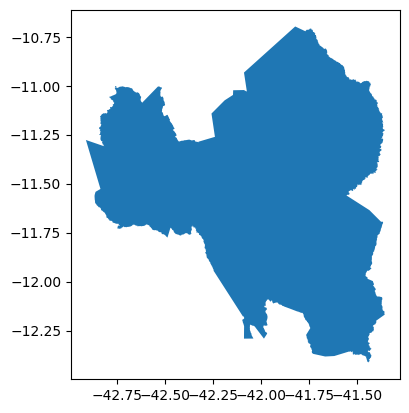

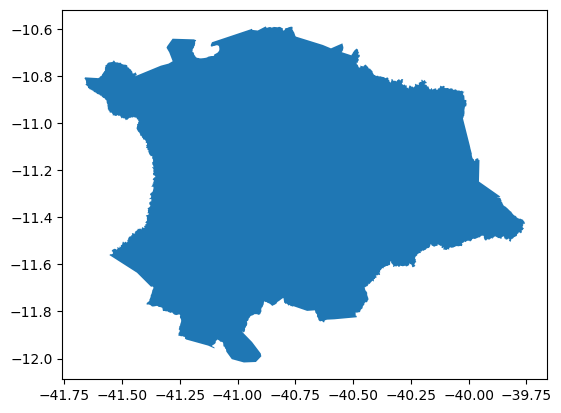

In [60]:
#Cria geodataframes das regiões de Jacobina e Irecê
reg_irece_gdf = reg_BA_gdf[reg_BA_gdf['NM_MICRO']=='Irecê']
reg_jacobina_gdf = reg_BA_gdf[reg_BA_gdf['NM_MICRO']=='Jacobina']
reg_irece_gdf.plot()
reg_jacobina_gdf.plot()

In [61]:
#Extrai os poligonos das RS
reg_BA_gdf.set_index('NM_MICRO', inplace=True)
pol_irece = reg_BA_gdf['geometry'].loc['Irecê']
pol_jacobina = reg_BA_gdf['geometry'].loc['Jacobina']
reg_BA_gdf.reset_index(inplace=True)

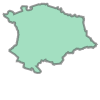

In [62]:
pol_jacobina

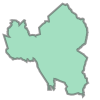

In [63]:
pol_irece

<Axes: >

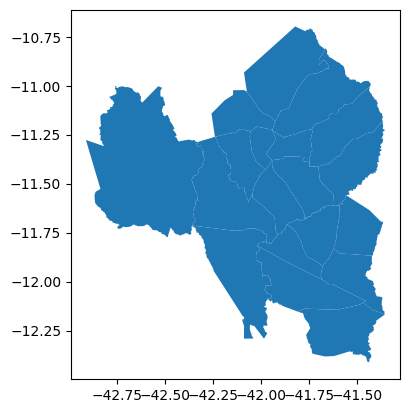

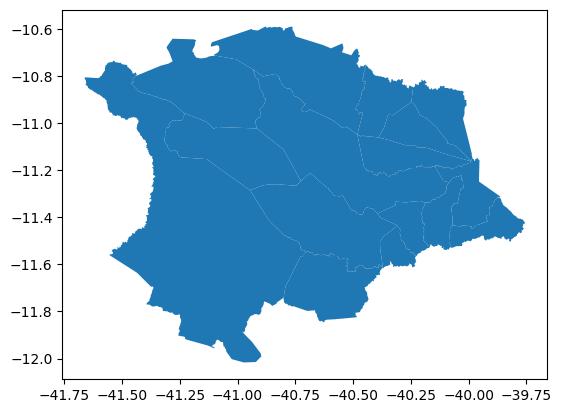

In [64]:
#Cria geodataframes dos municípios das regiões de Jacobina e Irecê
mun_jacobina_gdf = mun_BA_mesc_gdf[mun_BA_gdf['geometry'].within(pol_jacobina)]
mun_irece_gdf = mun_BA_mesc_gdf[mun_BA_gdf['geometry'].within(pol_irece)]
mun_irece_gdf.plot()
mun_jacobina_gdf.plot()

## 4.3 - REALIZAÇÃO DE ANÁLISES E VISUALIZAÇÃO DOS RESULTADOS

---


<br>

Neste trabalho, buscamos, através da linguagem de programação Python, apresentar, por meio de mapas e tabelas, duas Regiões de Saúde (RS) da Bahia: Irecê e Jacobina, da macroregião centro-norte. O objetivo é representar informações sobre a localização dessas duas regiões no Estado da Bahia, a população e sua densidade demográfica, e os principais equipamentos de saúde de média e alta complexidade disponíveis para o acesso dos pacientes do Sistema Único de Saúde (SUS). Com esses dados, buscamos problematizar as dificuldades de acesso que essas populações enfrentam em busca de assistência médica.
Como podemos observar nos mapas abaixo, as regiões de saúde de Irecê e Jacobina possuem grande extensão territorial. Tanto a RS de Irecê quanto a de Jacobina são compostas por 19 municípios. Essa organização regionalizada da saúde tem como objetivo prover no território condições para que a população que faz parte de uma RS possa suprir suas principais necessidades de assistência à saúde no próprio território, sem precisar fazer grandes deslocamentos para ter acesso a procedimentos de média e alta complexidade.

Conforme a tabela e o mapa apresentados nesta plataforma, tanto a RS de Irecê quanto a de Jacobina possuem população em torno de 400 mil habitantes, contudo com baixa densidade demográfica e grande população rural. Esses aspectos demográficos e espaciais do território influenciam as condições de acesso da população e precisam ser considerados para a tomada de decisão sobre a organização dos serviços do SUS no território.

Apresentamos também um mapa que mostra a distribuição dos principais equipamentos de saúde em média e alta complexidade nas duas regiões de saúde do estudo. Alguns equipamentos são de implantação recente, por exemplo, a policlínica regional de saúde de Irecê foi instalada em 2017 e a de Jacobina em 2019. Ainda mais recente, a Unidade de Alta Complexidade em Oncologia – UNACON de Irecê foi instalada em 2023, para atender toda a macroregião de Irecê e Jacobina, contudo ainda não está funcionando em plena capacidade.

Diante desse quadro, buscamos problematizar algumas questões sobre o acesso da população do interior da Bahia ao cuidado integral da saúde:

<br>

1. Os equipamentos de saúde instalados para atendimento à população são suficientes para atender à demanda? Sabemos que muitos pacientes do interior ainda lotam os hospitais e centros de tratamento em Salvador, que é a capital do Estado da Bahia, inclusive para tratamento oncológico. Assim, questiona-se: existe acessibilidade real à saúde em média e alta complexidade para a população do interior do Estado?

2. Diante de um estado com grande extensão territorial como é a Bahia, com regiões de saúde como Irecê e Jacobina com 400 mil habitantes cada uma e de baixa densidade demográfica, questiona-se como fica o acesso da população rural à saúde? Como é possível observar nos mapas, existe uma concentração dos principais equipamentos nas duas sedes regionais: o município de Irecê e o de Jacobina. Sabe-se que são as principais cidades da região e são as sedes regionais das duas RS. Contudo, também podemos questionar como facilitar o acesso dos pacientes que vivem em áreas mais remotas ou em municípios mais distantes das sedes regionais? A estrutura de saúde disponibilizada é suficiente e adequada para atender essa população?

3. Além disso, indaga-se também se a atual organização dos serviços pode ser mais bem adequada, a fim de diminuir distâncias, facilitar o acesso e disponibilizar com mais equidade territorial os serviços no espaço? Ou seria possível modelar melhor os caminhos da assistência para que os pacientes possam acessar os serviços de saúde conforme sua localização espacial?
Todos esses questionamentos servem para que possamos ampliar nosso olhar sobre a temática do acesso à saúde no interior da Bahia e levar para o debate público as dificuldades que diversos pacientes vivem para obter cuidados em saúde por meio do SUS.

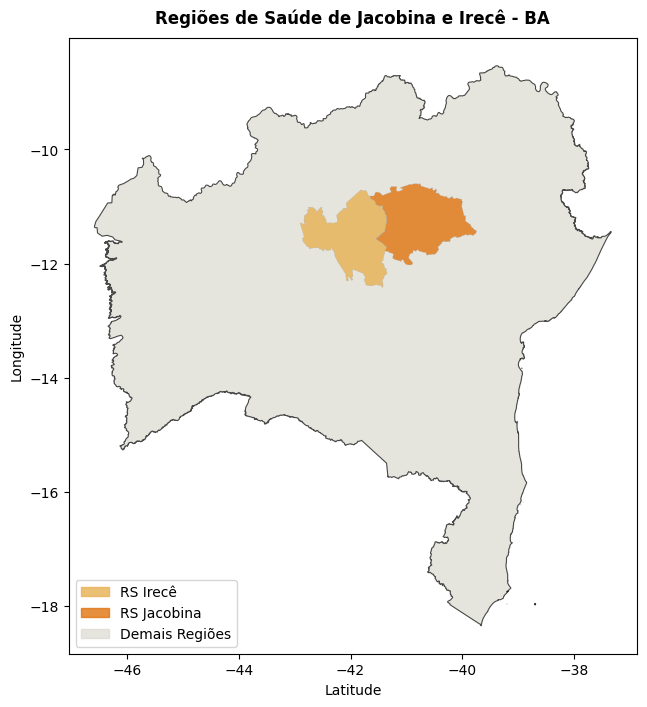

In [65]:
# @title 4.3.1 - Mapa de Localização das RS de Irecê e Jacobina

# Cria o gráfico
fig, ax = plt.subplots(figsize=(8, 8))


#Define o padrão de cores do mapa
p_cor = {'BA':'#dbdad0', 'IR':'#e8b151', 'JA':'#e0730d'}


#############--PLOTAGEM--################

BA_UF_gdf.plot(ax=ax, color=p_cor['BA'],
               alpha=0.7,
               edgecolor='k',
               linewidth=0.8
               )
reg_irece_gdf.plot(ax=ax,
                   color=p_cor['IR'],
                   alpha=0.8,
                   edgecolor='darkgray',
                   linewidth=0.2
                   )
reg_jacobina_gdf.plot(ax=ax,
                      color=p_cor['JA'],
                      alpha=0.8,
                      edgecolor='darkgray',
                      linewidth=0.2
                      )

#############--EIXOS--################

#EIXO -X-
ax.set_xlabel('Latitude')#Título

#EIXO -X-
ax.set_ylabel('Longitude')#Título

#############--LEGENDA--################

# Cria a legenda manualmente
legend_handles = [
    mpatches.Patch(color=p_cor['IR'], alpha=0.8, label='RS Irecê'),
    mpatches.Patch(color=p_cor['JA'], alpha=0.8, label='RS Jacobina'),
    mpatches.Patch(color=p_cor['BA'], alpha=0.7, label='Demais Regiões')
]

# Adiciona a legenda manualmente
ax.legend(handles=legend_handles,
          loc=3
          )

#Define o Título
ax.set_title('Regiões de Saúde de Jacobina e Irecê - BA',
             pad=10,
             fontweight='bold'
             )

#Salva o mapa
plt.savefig(saidas + 'Mapa_localizacao.png')

# Exibe o gráfico
plt.show()

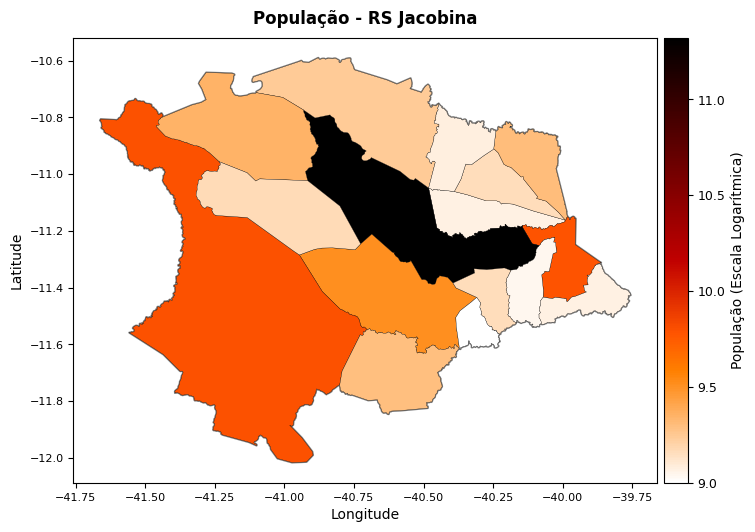

In [66]:
# @title 4.3.2 - Mapa de População e Densidade Demográfica das RS de Irecê e Jacobina { run: "auto" }

Dado = "Populacao" # @param ["Populacao", "Densidade Demografica"]
Regiao = "Jacobina" #@param ["Irece", "Jacobina"]

dado = {'Populacao':('POPULACAO', 'População'), 'Densidade Demografica': ('DENS_DEMO', 'Densidade Demográfica')}
gdf = {'Jacobina': (mun_jacobina_gdf.copy(), 'Jacobina'), 'Irece': (mun_irece_gdf.copy(), 'Irecê')}


# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))

#############--PLOTAGEM--################

# Define o padrão de cores
cmap = 'gist_heat_r'
vmin_log = np.log(gdf[Regiao][0][dado[Dado][0]].min())
vmax_log = np.log(gdf[Regiao][0][dado[Dado][0]].max())
norm = mcolors.Normalize(vmin=vmin_log, vmax=vmax_log)

#Plotar o contorno do mapa
gdf[Regiao][0].plot(ax=ax,
         color='white',
         alpha=1,
         edgecolor='gray',
         linewidth=1.5
         )
# Plotar o mapa coroplético com escala logarítmica
gdf[Regiao][0].plot(column=gdf[Regiao][0][dado[Dado][0]],
         ax=ax,
         cmap=cmap,
         linewidth=0.2,
         edgecolor='k',
         legend=False
         )

#############--EIXOS--################

#Título do eixo "x"
ax.set_xlabel('Longitude')

#Título do eixo "y"
ax.set_ylabel('Latitude')

# Ajustar o tamanho do texto dos eixos de coordenadas
ax.tick_params(axis='both',
               which='major',
               labelsize=8
               )

#############--TÍTULO--################

ax.set_title(f'{dado[Dado][1]} - RS {gdf[Regiao][1]}',
             pad=10,
             fontweight='bold')

#############--LEGENDA--################

# Cria uma coluna logarítmica
gdf[f'{dado[Dado][0]}_log'] = np.log(gdf[Regiao][0][dado[Dado][0]])

# Cria um eixo dividido para legenda
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                          size='4%',
                          pad=0.008
                          )

# Cria uma legenda personalizada
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

#Cria a legenda
cb = fig.colorbar(cbar,
                  cax=cax,
                  orientation='vertical',
                  location='right'
                  )

# Ajustar o tamanho dos ticks da legenda
cb.ax.tick_params(labelsize=9)

# Ajustar o tamanho do título da legenda
cb.set_label(f'{dado[Dado][1]} (Escala Logarítmica)',
             size=10
             )

#############--GRADE--################

ax.grid(False)

#Salva o mapa
plt.savefig(saidas + f'{Dado}_{Regiao}.png')

#Exibe o mapa
plt.show()

In [67]:
saidas + f'{Dado}_{Regiao}.png'

'/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Saidas/Populacao_Jacobina.png'

In [68]:
# @title 4.3.3 - Mapa da Distribuição dos Aparelhos de Saúde nas RS de Irecê e Jacobina { run: "auto" }
###
###
# Carregar o geodataframe de pontos
pts = pontos_gdf

#Carrega e une os geodataframes das RS
reg = pd.concat([reg_jacobina_gdf, reg_irece_gdf],ignore_index=True)

# Calcular a latitude e longitude médias das geometrias no geodatarame
latitude_central = pts.geometry.y.mean()
longitude_central = pts.geometry.x.mean()

#Cria o mapa base com as RS
mapa = reg.explore('NM_MICRO',
                           cmap='Set1',
                           tooltip='NM_MICRO',
                           tooltip_kwds=dict(labels=False),
                           style_kwds=dict(color='black'),
                           legend=True,
                           legend_kwds=dict(caption='REGIÕES'),
                           name='NM_MICRO'
                    )

# Adicionar um marcador ao mapa para cada aparelho no geodatarame
for idx, row in pts.iterrows():
    dir_imagem = '/content/drive/MyDrive/Trabalhos/INTRO/DADOS/Imagens/' + row['NM_ARQ']

    #Carrega a imagem que será usada no popup do marcador
    with open(dir_imagem, "rb") as imagem_arquivo:
        imagem_codificada = base64.b64encode(imagem_arquivo.read()).decode('utf-8')

    #Cria o cod. html com o conteúdo do popup
    html_popup = f"""
    <!DOCTYPE html>
    <html lang="pt-BR">
    <head>
        <meta charset="UTF-8">
        <title>Detalhes do Ponto de Saúde</title>
    </head>
    <body>
        <h4><b>{row['NM_PT']}</b></h4>
        <p><b>{row['CAT']}</b></p>
        <img src="data:image/jpg;base64,{imagem_codificada}" alt="Imagem do Ponto de Saúde" style="max-width:300px;">
        <p>Serviços: {row['SERV']}</p>
    </body>
    </html>
    """
    #Cria o marcador do ponto
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=folium.Popup(html_popup, max_width=450),
        tooltip=row['NM_PT'],
        icon=folium.Icon(color=row['COR'], icon_color='k', icon=row['ICO'], prefix='fa'),
        draggable=True
    ).add_to(mapa)

# Exibir o mapa
mapa

Output hidden; open in https://colab.research.google.com to view.

In [69]:
#Salva o mapa gerado no formato .html
mapa.save(saidas + 'MAPA.html')

# 5 - **CONSIDERAÇÕES FINAIS**

---







Este trabalho, realizado para o processo avaliativo da disciplina Introdução à Programação para o Geoprocessamento buscou levantar questionamentos sobre o acesso à saúde da população das Regiões de Saúde de Irecê e Jacobina na Bahia, principalmente para os serviços de média e alta complexidade e, por meio da linguagem de programação Python, tratar e representar os dados da pesquisa. Para tanto, iniciamos nosso trabalho apresentando e problematizando algumas informações sobre essas duas regiões, sua demografia, composição municipal e principais equipamentos de saúde e o resultado foi expressado através de mapas e tabelas.
Buscaremos, em trabalhos seguintes, ampliar as análises por meio do Python, trazendo mais dados sobre quantidade de atendimentos nas principais especialidades médicas, fluxos, rotas e meios disponíveis para acessibilidade local/regional dos pacientes. Assim, objetivamos, futuramente, apresentar um quadro mais completo sobre a assistência à saúde do SUS em Irecê e Jacobina, ampliar o debate e análises sobre a temática do acesso e da equidade em saúde e contribuir para a construção e o fortalecimento do SUS na Bahia.


# **REFERÊNCIAS**

---


ARAUJO, José D. de; FERREIRA, S. M. Emerson; NERY, Gabriel Cedraz. Regionalização dos serviços de saúde pública: a experiência do estado da Bahia, Brasil. Disponível em:< https://www.scielo.br/j/rsp/a/jRsQVjRxgSZWpybF69crJsz/?format=pdf&lang=pt>. Acesso em 09 de mar. De 2023.

BRASIL. Ministério da Saúde. Banco de dados do Sistema Único de Saúde- DATASUS. Disponível em: https://www.datasus.gov.br. Acesso em: 19 de jul. 2021.

FONSECA, Bruna de Paula; ALBUQUERQUE, Priscila Costa; SALDANHA, Raphael de Freitas; ZICKER, Fabio. Geographic accessibility to cancer treatment in Brazil: A network analysis. The Lancet Regional Health – Americas, v.7, 100153, (2022). Doi:https://doi.org/10.1016/j.lana.2021.100153. Disponível em: https://www.thelancet.com/journals/lanam/article/PIIS2667-193X(21)00149-6/fulltext. Acesso em: 26 de jul. 2023.

FRENK, Julio. El concepto y la medición de accesibilidad. Salud Publica de Mexico. 1985. Disponível em: < https://www.studocu.com/co/document/universidad-libre-de-colombia/sistema-de-seguridad-social-en-salud/el-concepto-y-a-medicion-de-accesibilidad/12450082>. Acesso em: 01 de jan. 2023.

OLIVEIRA, Evangelina Xavier Gouveia de. et al. Acesso à assistência oncológica: mapeamento dos fluxos origem-destino das internações e dos
atendimentos ambulatoriais. O caso do câncer de mama. Caderno de Saúde Pública, Rio de Janeiro, 27(2):317-326, fev, 2011.

PAIM, Jairnilson. et al. O sistema de saúde brasileiro: história, avanços e desafios. The Lancet, online, 9 maio 2011. Disponível em: https://actbr.org.br/uploads/arquivo/925_brazil1.pdf. Acesso em: 15 mar. 2021.

PALMA, Pedro; DA COSTA, Eduarda Marques; DA COSTA, Nuno Marques. Disparidades regionais no acesso aos serviços de saúde em territórios de baixa densidade: os casos do Alentejo (Portugal) e Navarra (Espanha). In: Soares, Beatriz Ribeiro… [et al.] (coord.). Construindo cidades saudáveis: utopias e práticas. Uberlândia (MG): Assis Editora. 2017. Disponível em:< https://repositorio.ul.pt/handle/10451/42402>. Acesso em 29 de maio de 2023.


PESSOTO, Umberto Catarino. A REGIONALIZAÇÃO DO SISTEMA ÚNICO DE SAÚDE – SUS NO FIM DOS ANOS 1990: UM DISCURSO CONSERVADOR. 2010. Tese. (Pós-graduação em Geografia). - Universidade Estadual Paulista, Faculdade de Ciências e Tecnologia, 2010.

SCHAFER, Alexandro G. Programação para Geoprocessamento. 2024. Disponível em: https://alexandrogschafer.github.io/Programacao-Geoprocessamento/intro.html. Acesso em: 20 de mar. 2024.